<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/026_rnn_lstm_search_t_1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.12 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with RNN & LSTM (Variables: + Search Volume) - Results (2018-2022)**

|Search Volume     |Variables     |
|------------------|--------------|
|t-1               |t_sv          |

<br>

### Contents

##### 1. Input Data
*  月營收盈餘 (2013-2022)
*  網路聲量 (2013-2022)：t-1 的平均 (*new)

##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  RNN
*  LSTM
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Read Saved Results (*new)
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  RNN 和 LSTM 各自預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合






## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00


In [4]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [5]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstModelNN, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00


In [6]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [7]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [8]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [9]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

### **1.1 月營收盈餘 (2013-2022)**

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [10]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
公司                                                                        
1101 台泥   9134465  5540346  9457971  9919269  9543782  9517630  9875888   
1102 亞泥   6018213  2552357  5428755  5930748  6239676  5952754  5942364   
1103 嘉泥    288455   166638   286007   365292   382601   302995   294781   
1104 環泥    486481   299860   461732   394631   406677   415968   453397   
1108 幸福    481802   276936   444917   362054   381384   368109   439572   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    201785   167967   240746   243935   238296   193880   198427   
9955 佳龍    394489   383183   428478   564053   336622   295391   434605   
9958 世紀鋼   198944   166364   351222   280864   289332   426371   213281   
9960 邁達康    52534    41935    61642    70998    81508    64525    62085   
9962 有益    298876   327002   313861   241566   251782   273664   174682   

          2013-08   2013-09   2013-10  ...  2022-03  2022-04  2022-05  \
公司                                     ...                              
1101 台泥   9835143  10060975  10654077  ...  9971650  8319342  7733787   
1102 亞泥   5786107   5879394   6478670  ...  8160414  8710220  8000427   
1103 嘉泥    336088    314563    429783  ...   220463   168089   163521   
1104 環泥    393203    448691    521445  ...   591593   638493   537082   
1108 幸福    379115    387362    450770  ...   345612   335518   332258   
...           ...       ...       ...  ...      ...      ...      ...   
9951 皇田    256724    228796    250756  ...   374229   302262   323433   
9955 佳龍    306534    266617    363766  ...    96200   101850    95096   
9958 世紀鋼   302589    401695    255738  ...   626104   401960   673479   
9960 邁達康    60960     60309     61582  ...    60275    86754    69752   
9962 有益    238490    165340    202491  ...   366892   248958   228412   

          2022-06   2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                            
1101 台泥   9145989  10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥   7776413   7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥    183177    178825    182371    205264    209429   221763    228644  
1104 環泥    573028    580420    605512    597159    634981   631827    725055  
1108 幸福    334113    326691    390053    346635    401202   383773    418326  
...           ...       ...       ...       ...       ...      ...       ...  
9951 皇田    371791    337581    468608    464373    432835   500111    506796  
9955 佳龍     80726     85625     81881     79179     80630    91270     84115  
9958 世紀鋼   665459    651699    757968    903198    911834   944060   1082675  
9960 邁達康   103280     64983    105969    113755     78996    96570     58764  
9962 有益    387082    248327    318092    264270    307426   308663    385673  

[1240 rows x 120 columns]

In [11]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 網路聲量 (2013-2022)：t-4 到 t-1 的平均**

In [12]:
search_volume_data = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_t-1.csv'), index_col = 0)
search_volume_data.columns = pd.to_datetime(search_volume_data.columns, format="%Y-%m-%d").to_period('M')
search_volume_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
1101 台泥      57.0     66.0      0.0      0.0      0.0     27.0    100.0   
1102 亞泥      85.0      0.0      0.0      0.0      0.0      0.0      0.0   
1103 嘉泥       0.0     58.0      0.0     94.0      0.0      0.0      0.0   
1104 環泥       0.0      0.0     96.0      0.0      0.0     45.0      0.0   
1108 幸福      83.0     56.0     73.0     80.0     65.0     66.0     92.0   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田       0.0      0.0      0.0      0.0     18.0      0.0     52.0   
9955 佳龍      43.0      0.0      0.0      0.0      0.0      0.0     42.0   
9958 世紀鋼    100.0      0.0     64.0      0.0     85.0      0.0      0.0   
9960 邁達康    100.0      0.0     78.0      0.0      0.0      0.0     33.0   
9962 有益       0.0      0.0      0.0      0.0     49.0      0.0      0.0   

          2013-08  2013-09  2013-10  ...  2022-03  2022-04  2022-05  2022-06  \
1101 台泥       0.0      0.0      0.0  ...     20.0     53.0     66.0     19.0   
1102 亞泥       0.0      0.0      0.0  ...     54.0     52.0     78.0     74.0   
1103 嘉泥       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
1104 環泥       0.0      0.0      0.0  ...      0.0      0.0     54.0      0.0   
1108 幸福      94.0     74.0     75.0  ...     82.0     92.0     71.0     67.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
9951 皇田       0.0      0.0      0.0  ...      0.0     39.0     72.0      0.0   
9955 佳龍       0.0      0.0      0.0  ...     32.0    100.0     35.0      0.0   
9958 世紀鋼      0.0      0.0      0.0  ...     38.0      0.0     35.0     32.0   
9960 邁達康      0.0      0.0      0.0  ...     21.0      0.0      0.0      0.0   
9962 有益       0.0     38.0     88.0  ...     89.0     29.0     34.0     30.0   

          2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
1101 台泥      58.0     30.0     62.0     57.0     79.0     73.0  
1102 亞泥      70.0     50.0     81.0     49.0      0.0    100.0  
1103 嘉泥      28.0      0.0      0.0      0.0      0.0     29.0  
1104 環泥       0.0      0.0      0.0      0.0     58.0      0.0  
1108 幸福      69.0     77.0     84.0     77.0     92.0     62.0  
...           ...      ...      ...      ...      ...      ...  
9951 皇田      46.0      0.0      0.0      0.0      0.0      0.0  
9955 佳龍      36.0     43.0     37.0     71.0      0.0      0.0  
9958 世紀鋼      0.0     48.0     60.0     23.0    100.0      0.0  
9960 邁達康    100.0      0.0     49.0     47.0     35.0     27.0  
9962 有益      38.0     41.0     80.0     66.0      0.0     38.0  

[1240 rows x 120 columns]

In [13]:
print("Data shape:", search_volume_data.shape)
print("Data size:", search_volume_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_rnn = os.path.join(project_path, 'model/search_volume/t-1/rnn')
model_save_path_lstm = os.path.join(project_path, 'model/search_volume/t-1/lstm')

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **RNN**

2018 (5.75 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 2131.587  secs.
2018-02 model saved. Using time: 2090.073  secs.
2018-03 model saved. Using time: 2175.827  secs.
2018-04 model saved. Using time: 2214.701  secs.
2018-05 model saved. Using time: 2214.549  secs.
2018-06 model saved. Using time: 2262.921  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2018-07 model saved. Using time: 1229.736  secs.
2018-08 model saved. Using time: 1206.666  secs.
2018-09 model saved. Using time: 1305.742  secs.
2018-10 model saved. Using time: 1338.709  secs.
2018-11 model saved. Using time: 1294.269  secs.
2018-12 model saved. Using time: 1367.816  secs.


2019 (6.75 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 2013.567  secs.
2019-02 model saved. Using time: 1892.031  secs.
2019-03 model saved. Using time: 1905.402  secs.
2019-04 model saved. Using time: 2004.853  secs.
2019-05 model saved. Using time: 1952.022  secs.
2019-06 model saved. Using time: 1950.692  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2019-07 model saved. Using time: 2019.429  secs.
2019-08 model saved. Using time: 2031.396  secs.
2019-09 model saved. Using time: 2017.529  secs.
2019-10 model saved. Using time: 2182.761  secs.
2019-11 model saved. Using time: 2242.748  secs.
2019-12 model saved. Using time: 2119.909  secs.


2020 (3.9 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 1210.659  secs.
2020-02 model saved. Using time: 1252.964  secs.
2020-03 model saved. Using time: 1132.856  secs.
2020-04 model saved. Using time: 1143.617  secs.
2020-05 model saved. Using time: 1225.887  secs.
2020-06 model saved. Using time: 1201.309  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2020-07 model saved. Using time: 1123.698  secs.
2020-08 model saved. Using time: 1135.340  secs.
2020-09 model saved. Using time: 1118.845  secs.
2020-10 model saved. Using time: 1119.293  secs.
2020-11 model saved. Using time: 1077.759  secs.
2020-12 model saved. Using time: 1122.346  secs.


2021 (6.9 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 1929.591  secs.
2021-02 model saved. Using time: 1912.560  secs.
2021-03 model saved. Using time: 2046.202  secs.
2021-04 model saved. Using time: 1944.984  secs.
2021-05 model saved. Using time: 2033.820  secs.
2021-06 model saved. Using time: 2035.478  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2021-07 model saved. Using time: 2138.718  secs.
2021-08 model saved. Using time: 2111.016  secs.
2021-09 model saved. Using time: 2123.296  secs.
2021-10 model saved. Using time: 2095.926  secs.
2021-11 model saved. Using time: 2226.127  secs.
2021-12 model saved. Using time: 2147.082  secs.


2022 (6.75 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 2009.796  secs.
2022-02 model saved. Using time: 2031.636  secs.
2022-03 model saved. Using time: 2044.942  secs.
2022-04 model saved. Using time: 1906.537  secs.
2022-05 model saved. Using time: 2019.227  secs.
2022-06 model saved. Using time: 1959.883  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

2022-07 model saved. Using time: 1949.883  secs.
2022-08 model saved. Using time: 2097.655  secs.
2022-09 model saved. Using time: 2069.648  secs.
2022-10 model saved. Using time: 2086.573  secs.
2022-11 model saved. Using time: 2060.053  secs.
2022-12 model saved. Using time: 2102.174  secs.


#### **LSTM**

2018 (7.9 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 2245.757  secs.
2018-02 model saved. Using time: 2246.315  secs.
2018-03 model saved. Using time: 2310.359  secs.
2018-04 model saved. Using time: 2278.300  secs.
2018-05 model saved. Using time: 2207.502  secs.
2018-06 model saved. Using time: 2324.480  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2018-07 model saved. Using time: 2451.021  secs.
2018-08 model saved. Using time: 2430.473  secs.
2018-09 model saved. Using time: 2470.097  secs.
2018-10 model saved. Using time: 2438.302  secs.
2018-11 model saved. Using time: 2365.482  secs.
2018-12 model saved. Using time: 2365.226  secs.


2019 (9.2 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 2365.808  secs.
2019-02 model saved. Using time: 2494.586  secs.
2019-03 model saved. Using time: 2768.924  secs.
2019-04 model saved. Using time: 3076.310  secs.
2019-05 model saved. Using time: 3054.885  secs.
2019-06 model saved. Using time: 3142.175  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2019-07 model saved. Using time: 2686.870  secs.
2019-08 model saved. Using time: 2635.157  secs.
2019-09 model saved. Using time: 2686.896  secs.
2019-10 model saved. Using time: 2775.747  secs.
2019-11 model saved. Using time: 2634.547  secs.
2019-12 model saved. Using time: 2706.993  secs.


2020 (4.9 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 1511.193  secs.
2020-02 model saved. Using time: 1506.560  secs.
2020-03 model saved. Using time: 1642.330  secs.
2020-04 model saved. Using time: 1521.375  secs.
2020-05 model saved. Using time: 1502.729  secs.
2020-06 model saved. Using time: 1395.534  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2020-07 model saved. Using time: 1367.483  secs.
2020-08 model saved. Using time: 1387.033  secs.
2020-09 model saved. Using time: 1462.297  secs.
2020-10 model saved. Using time: 1458.288  secs.
2020-11 model saved. Using time: 1413.597  secs.
2020-12 model saved. Using time: 1455.441  secs.


2021 (7.3 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 2379.451  secs.
2021-02 model saved. Using time: 2492.597  secs.
2021-03 model saved. Using time: 2607.528  secs.
2021-04 model saved. Using time: 2677.452  secs.
2021-05 model saved. Using time: 2550.727  secs.
2021-06 model saved. Using time: 2490.061  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2021-07 model saved. Using time: 1686.924  secs.
2021-08 model saved. Using time: 1708.526  secs.
2021-09 model saved. Using time: 1876.328  secs.
2021-10 model saved. Using time: 1887.973  secs.
2021-11 model saved. Using time: 1948.237  secs.
2021-12 model saved. Using time: 1745.688  secs.


2022 (8.3 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 2357.896  secs.
2022-02 model saved. Using time: 2374.028  secs.
2022-03 model saved. Using time: 2379.416  secs.
2022-04 model saved. Using time: 2457.555  secs.
2022-05 model saved. Using time: 2435.699  secs.
2022-06 model saved. Using time: 2423.019  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

2022-07 model saved. Using time: 2531.588  secs.
2022-08 model saved. Using time: 2493.432  secs.
2022-09 model saved. Using time: 2668.818  secs.
2022-10 model saved. Using time: 2641.144  secs.
2022-11 model saved. Using time: 2644.275  secs.
2022-12 model saved. Using time: 2576.601  secs.


### **5.2.4 Training History**

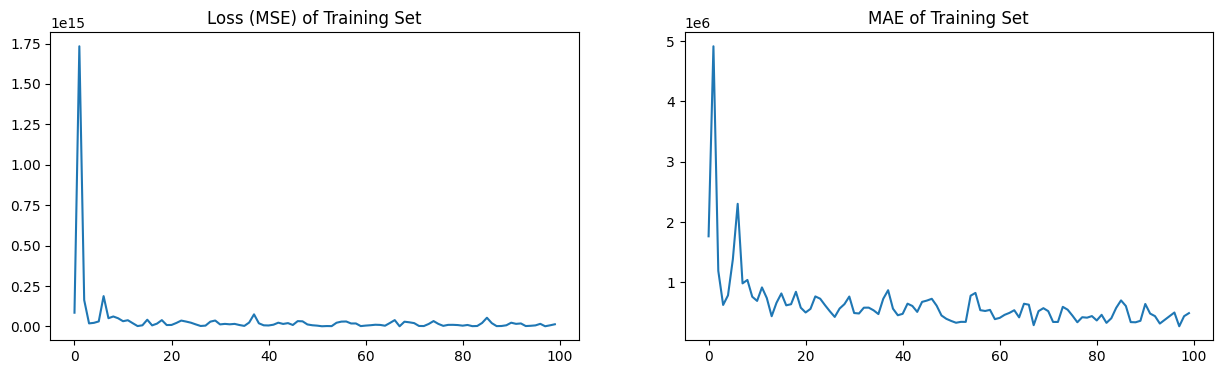

In [14]:
# RNN
model_save_path_rnn = os.path.join(project_path, 'model/search_volume/t-1/rnn')
plotTrainingHistory(model_save_path_rnn, '2022-12', 'model')

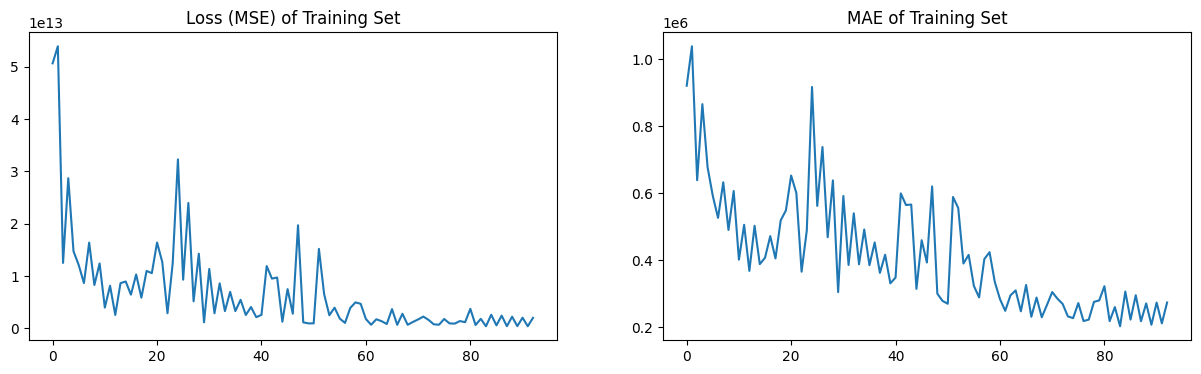

In [15]:
# LSTM
model_save_path_lstm = os.path.join(project_path, 'model/search_volume/t-1/lstm')
plotTrainingHistory(model_save_path_lstm, '2022-12', 'model')

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [ ]:
file_category = 'search_volume'
search_volume_type = 't-1'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict, searchType: str):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame, searchType: str):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'))

### **7.2 RNN**

In [ ]:
# Load trained model
model_save_path_rnn = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/rnn')

In [ ]:
# RNN (10 min.)
pred_rnn, scores_rnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'rnn', model_save_path_rnn, search_volume_data = search_volume_data)

Using time: 689.516  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'rnn', pred_rnn, search_volume_type)
outputScores(file_category, 'rnn', scores_rnn, search_volume_type)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rnn['org']['org'].shape)
print(pred_rnn['org']['dec'].shape)
print(pred_rnn['org']['season'].shape)
pred_rnn['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7807988.0  7289054.0  8864493.0  7818391.0  7593233.0  9020219.0   
1102 亞泥  5368872.0  4746655.0  5814120.0  5175618.0  5105826.0  5371402.0   
1103 嘉泥   202963.0   201842.0   205487.0   175218.0   162839.0   163676.0   
1104 環泥   370162.0   334935.0   335490.0   359713.0   304878.0   367007.0   

           2018-07    2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  9245655.0  9417241.0  10326113.0  10101584.0  ...  9311320.0   
1102 亞泥  6345748.0  6273884.0   6982533.0   6655157.0  ...  7774574.0   
1103 嘉泥   125650.0   157845.0    205977.0    166063.0  ...   186576.0   
1104 環泥   355115.0   372342.0    365010.0    363787.0  ...   544294.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9620000.0  8865723.0  8649586.0  9372974.0  8744605.0  10458691.0   
1102 亞泥  7955557.0  7925704.0  8364221.0  8378502.0  8195469.0   8838784.0   
1103 嘉泥   172407.0   180626.0   197166.0   142380.0   178237.0    201213.0   
1104 環泥   479387.0   533245.0   588451.0   560913.0   581418.0    659708.0   

            2022-10     2022-11     2022-12  
1101 台泥  11345081.0  10511599.0  11059055.0  
1102 亞泥   8622962.0   8745253.0   8909758.0  
1103 嘉泥    205322.0    204880.0    160015.0  
1104 環泥    597926.0    465030.0    664150.0  

[4 rows x 60 columns]

In [ ]:
# Deflating
print(pred_rnn['def']['org'].shape)
print(pred_rnn['def']['dec'].shape)
print(pred_rnn['def']['season'].shape)
pred_rnn['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7035107.0  7729643.0  8602334.0  9303586.0  10319348.0  10667127.0   
1102 亞泥  5038727.0  4249408.0  5974657.0  6050376.0   6133945.0   6173172.0   
1103 嘉泥   148459.0   121504.0   168419.0   176450.0    165827.0    159473.0   
1104 環泥   351420.0   321348.0   386334.0   394882.0    371855.0    427483.0   

           2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  9627918.0  11371249.0  10949336.0  10187760.0  ...  8681243.0   
1102 亞泥  6633775.0   8163245.0   7172380.0   7105756.0  ...  8070564.0   
1103 嘉泥   159330.0    155725.0    172870.0    165216.0  ...   184074.0   
1104 環泥   360561.0    373492.0    378613.0    382173.0  ...   558145.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
1101 台泥  9452806.0  8255879.0  8731210.0  8093602.0  8323488.0  9534646.0   
1102 亞泥  8935806.0  7291004.0  8307314.0  8340114.0  7536946.0  7261556.0   
1103 嘉泥   170316.0   176573.0   176453.0   169504.0   179338.0   193532.0   
1104 環泥   587705.0   600250.0   545957.0   539143.0   562784.0   595207.0   

            2022-10     2022-11     2022-12  
1101 台泥  10359017.0  11667861.0  12553624.0  
1102 亞泥   8064050.0   8357514.0   9629438.0  
1103 嘉泥    191121.0    214902.0    225058.0  
1104 環泥    591953.0    638263.0    707540.0  

[4 rows x 60 columns]

### **7.3 LSTM**


In [ ]:
# Load trained models
model_save_path_lstm = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/lstm')

In [ ]:
# LSTM (13 min.)
pred_lstm, scores_lstm = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'lstm', model_save_path_lstm, search_volume_data = search_volume_data)

Using time: 913.533  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'lstm', pred_lstm, search_volume_type)
outputScores(file_category, 'lstm', scores_lstm, search_volume_type)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_lstm['org']['org'].shape)
print(pred_lstm['org']['dec'].shape)
print(pred_lstm['org']['season'].shape)
pred_lstm['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  8055206.0  7414733.0  8274629.0  7840903.0  7942417.0  8221863.0   
1102 亞泥  5440076.0  4719064.0  5445534.0  5231243.0  5381582.0  5079262.0   
1103 嘉泥   242510.0   136249.0   245935.0   130504.0   143872.0   109329.0   
1104 環泥   394493.0   213456.0   393602.0   365368.0   367595.0   358003.0   

           2018-07    2018-08    2018-09    2018-10  ...    2022-03  \
1101 台泥  8715011.0  9827892.0  9735666.0  9932680.0  ...  9325824.0   
1102 亞泥  5953359.0  6615149.0  6634762.0  6819398.0  ...  8696068.0   
1103 嘉泥   189656.0    99184.0   236451.0   150042.0  ...   169098.0   
1104 環泥   400176.0   433683.0   414783.0   389530.0  ...   545093.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9487570.0  8246208.0  8645426.0  9248539.0  9278357.0  10609462.0   
1102 亞泥  7862900.0  7601932.0  8105226.0  7863778.0  8124686.0   9075754.0   
1103 嘉泥   171807.0   186574.0   199526.0   188543.0   172326.0    203601.0   
1104 環泥   512351.0   517312.0   602439.0   558396.0   535170.0    668979.0   

           2022-10     2022-11     2022-12  
1101 台泥  9279308.0  11607253.0  12913506.0  
1102 亞泥  8280310.0   8992772.0  10991443.0  
1103 嘉泥   209033.0    150585.0    226430.0  
1104 環泥   619798.0    648247.0    677322.0  

[4 rows x 60 columns]

In [ ]:
print(pred_lstm['def']['org'].shape)
print(pred_lstm['def']['dec'].shape)
print(pred_lstm['def']['season'].shape)
pred_lstm['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7067459.0  8094115.0  8676931.0  9646569.0  10120634.0  11373610.0   
1102 亞泥  5066263.0  4874208.0  6352251.0  6030702.0   6122777.0   6108873.0   
1103 嘉泥   142255.0    90574.0   166160.0   160547.0    148428.0    170340.0   
1104 環泥   347646.0   342041.0   404735.0   378805.0    392387.0    400454.0   

           2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  9418040.0  11839938.0  10655663.0  10128053.0  ...  9176134.0   
1102 亞泥  6593556.0   7959529.0   7006711.0   7079908.0  ...  8074008.0   
1103 嘉泥   187596.0    144271.0    204723.0    207582.0  ...   184654.0   
1104 環泥   379189.0    393873.0    365206.0    392303.0  ...   556273.0   

           2022-04    2022-05    2022-06    2022-07    2022-08    2022-09  \
1101 台泥  9609989.0  9069523.0  9081405.0  8597274.0  9229783.0  9645792.0   
1102 亞泥  8753653.0  7914140.0  7652688.0  7990020.0  7486703.0  7277010.0   
1103 嘉泥   210157.0   171310.0   172552.0   171110.0   180630.0   196998.0   
1104 環泥   606723.0   542707.0   556746.0   564635.0   560430.0   603961.0   

            2022-10     2022-11     2022-12  
1101 台泥  10848542.0  12289422.0  12119754.0  
1102 亞泥   8056881.0   8677593.0   9555563.0  
1103 嘉泥    202693.0    229843.0    226002.0  
1104 環泥    604047.0    623210.0    693996.0  

[4 rows x 60 columns]

### **7.4 Scores**

In [ ]:
# RNN
scores_rnn

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1172700.0  258935.0    0.1329    0.5165  1175268.0  228144.0   
2018-02  1171101.0  243175.0    0.1632    0.7518   798789.0  182559.0   
2018-03  1218062.0  205137.0    0.1093    0.4126  1042162.0  181960.0   
2018-04   895397.0  233671.0    0.1303    0.9643  2105854.0  238036.0   
2018-05  1457975.0  263423.0    0.1391    0.2910   690271.0  167056.0   
2018-06  1944889.0  252469.0    0.1319    0.2728  1320954.0  197549.0   
2018-07  1667985.0  216665.0    0.1101    0.4094  2751405.0  247626.0   
2018-08  1232665.0  197397.0    0.0959    0.2233  1387925.0  171788.0   
2018-09  3124963.0  286165.0    0.1282    0.5985  1988614.0  204914.0   
2018-10  1761569.0  255753.0    0.1117    0.5645  3058461.0  285771.0   
2018-11  1472592.0  285613.0    0.1270    1.2188  1882750.0  210654.0   
2018-12  2304313.0  454716.0    0.2114    7.6918  1564798.0  235952.0   
2019-01  1298831.0  259453.0    0.1328    0.7349  1571242.0  226526.0   
2019-02  1373995.0  232004.0    0.1618    0.6237  1802898.0  251866.0   
2019-03  1700000.0  275355.0    0.1466    0.5328  2969254.0  259842.0   
2019-04   779648.0  191544.0    0.1039    1.5276   741850.0  153475.0   
2019-05   775281.0  172314.0    0.0910    0.2859   644640.0  151130.0   
2019-06   938320.0  227333.0    0.1200    0.9290  1051519.0  175661.0   
2019-07  1106755.0  211611.0    0.1093    0.2255   524724.0  124536.0   
2019-08  1461997.0  248230.0    0.1256    0.4790  2352268.0  230132.0   
2019-09  1277544.0  243879.0    0.1106    0.3124  3453967.0  261216.0   
2019-10  2127109.0  375126.0    0.1708    0.9652  3397641.0  247891.0   
2019-11  1045512.0  247635.0    0.1134    0.4986  1858344.0  214087.0   
2019-12  2512679.0  246694.0    0.1165    1.0251  2858353.0  240100.0   
2020-01  3572743.0  471226.0    0.2743    1.4662  2909586.0  341454.0   
2020-02  2573791.0  325340.0    0.2397    1.3637  1407236.0  235323.0   
2020-03  1465620.0  265526.0    0.1458    1.2470  2155700.0  240719.0   
2020-04  1443940.0  290756.0    0.1613    3.0784  1682182.0  264851.0   
2020-05  1227776.0  234757.0    0.1287    1.0862  1295015.0  217682.0   
2020-06  1864923.0  299746.0    0.1574    0.6082  1764315.0  237693.0   
2020-07  1332141.0  259577.0    0.1306    0.4972  1296324.0  210531.0   
2020-08  1431121.0  271018.0    0.1345    2.4536  1129915.0  200639.0   
2020-09  3333950.0  383463.0    0.1751    1.4794  1085199.0  236913.0   
2020-10  2331017.0  278746.0    0.1248    0.6352  3085909.0  245396.0   
2020-11  3086876.0  339006.0    0.1406    2.0100  2485027.0  249835.0   
2020-12  5142908.0  387221.0    0.1573    2.8259  4890599.0  349286.0   
2021-01  4701475.0  615776.0    0.2799    2.2094  4157065.0  481486.0   
2021-02  4856301.0  433050.0    0.2412    2.7762  1809085.0  258746.0   
2021-03  2243877.0  456068.0    0.2025    8.3149  2791751.0  376566.0   
2021-04  2192507.0  420846.0    0.1887    1.0533  1688115.0  274740.0   
2021-05  1449661.0  375603.0    0.1705    1.5728  1735883.0  244627.0   
2021-06  1830589.0  255815.0    0.1139    1.5080  2509139.0  284135.0   
2021-07  1987401.0  320453.0    0.1415    1.1080  1901184.0  251753.0   
2021-08  2942137.0  344822.0    0.1502    1.2186  1179914.0  234228.0   
2021-09  1937145.0  306052.0    0.1185    0.5938  2256470.0  290073.0   
2021-10  2587689.0  376170.0    0.1509    7.0736  3563724.0  353216.0   
2021-11  2697873.0  333995.0    0.1239    1.3532  1335563.0  245031.0   
2021-12  1190484.0  313532.0    0.1111   13.7781  1131919.0  227586.0   
2022-01  2370055.0  359050.0    0.1463    0.5522  3675330.0  373802.0   
2022-02  2455375.0  304208.0    0.1424    4.1751  2049206.0  230265.0   
2022-03  1690200.0  353010.0    0.1338    3.3246  1095839.0  237221.0   
2022-04  2303706.0  378847.0    0.1641    2.2762  3103348.0  424765.0   
2022-05  1320016.0  230102.0    0.0939    0.6399  1964240.0  244527.0   
2022-06  2028669.0  393012.0    0.1482    0.7910  2344944.0  333607.

In [ ]:
# LSTM
scores_lstm

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1451802.0  267886.0    0.1375    0.3820  1375880.0  239146.0   
2018-02  1395031.0  246911.0    0.1657    0.4206  1886608.0  247319.0   
2018-03  1173421.0  251525.0    0.1340    0.2932  1218495.0  183062.0   
2018-04   956068.0  250859.0    0.1399    0.5676  1366391.0  198073.0   
2018-05  1630841.0  233588.0    0.1234    0.2171   643623.0  150834.0   
2018-06  2284031.0  285557.0    0.1491    0.2903  1342605.0  192669.0   
2018-07  1656815.0  283540.0    0.1441    0.4740  1214369.0  187767.0   
2018-08  1649513.0  246097.0    0.1195    0.3327  1225720.0  172382.0   
2018-09  2843808.0  267187.0    0.1197    0.4239  3027938.0  225979.0   
2018-10  1300043.0  227481.0    0.0993    0.3583  3894064.0  307411.0   
2018-11  2283669.0  385646.0    0.1715    0.5270  1055523.0  174599.0   
2018-12  4555827.0  590149.0    0.2743    0.6934  1702455.0  243593.0   
2019-01  2079440.0  294035.0    0.1505    0.4638  2367281.0  235404.0   
2019-02  2887844.0  308797.0    0.2154    0.6333  2000230.0  261362.0   
2019-03   844647.0  202403.0    0.1078    0.2769   770937.0  142157.0   
2019-04   992165.0  229636.0    0.1246    0.2844   844077.0  157854.0   
2019-05  1203647.0  271101.0    0.1431    0.3329   811410.0  152983.0   
2019-06   968892.0  220590.0    0.1164    0.3432   819866.0  169112.0   
2019-07  1588696.0  243474.0    0.1258    0.2289  1078292.0  167399.0   
2019-08  1625174.0  260439.0    0.1318    0.2593  1190347.0  190970.0   
2019-09  1133710.0  281972.0    0.1279    0.3654  3878002.0  271662.0   
2019-10  2090515.0  399117.0    0.1818    0.3673   767229.0  154613.0   
2019-11  1164265.0  301620.0    0.1382    0.3339   962189.0  162707.0   
2019-12  2988873.0  354978.0    0.1677    0.6785  4060448.0  291921.0   
2020-01  3006523.0  422554.0    0.2460    0.4789  2845016.0  353702.0   
2020-02  4489393.0  484095.0    0.3566    1.5234  1857552.0  251746.0   
2020-03  1355711.0  251810.0    0.1383    0.5978   882724.0  185268.0   
2020-04  1504178.0  298294.0    0.1655    0.7719  1485536.0  247578.0   
2020-05  1241660.0  247152.0    0.1355    1.6568  1573849.0  213575.0   
2020-06  2229857.0  295183.0    0.1550    0.5062  2579662.0  232698.0   
2020-07  1236084.0  251578.0    0.1266    0.3722  1472913.0  190707.0   
2020-08  1591173.0  313122.0    0.1553    0.9516   850189.0  168326.0   
2020-09  4188724.0  473906.0    0.2164    0.9184   779541.0  182235.0   
2020-10  1658109.0  296752.0    0.1329    0.6486  3436469.0  257723.0   
2020-11  6542957.0  558323.0    0.2316    0.8655  4221051.0  333293.0   
2020-12  5007892.0  455373.0    0.1849    1.1531  4720598.0  326773.0   
2021-01  3008325.0  460818.0    0.2095    0.8482  2645508.0  452495.0   
2021-02  2960385.0  495196.0    0.2758    0.3738  2582402.0  257304.0   
2021-03  1837949.0  400821.0    0.1780    3.5291  1079680.0  258269.0   
2021-04  3377934.0  380643.0    0.1707    0.2874  1634573.0  225351.0   
2021-05  1259015.0  280134.0    0.1271    0.3334  1386864.0  236243.0   
2021-06  1502167.0  232657.0    0.1036    0.8208  2276950.0  242057.0   
2021-07  3055402.0  350732.0    0.1549    1.1407  1102755.0  200112.0   
2021-08  3155974.0  415971.0    0.1812    0.3724   900510.0  176443.0   
2021-09  1684055.0  289971.0    0.1123    0.7032  2537901.0  285507.0   
2021-10  2280248.0  336517.0    0.1350    0.3344  1654613.0  231135.0   
2021-11  2292288.0  321343.0    0.1192    0.2710  1086433.0  205113.0   
2021-12  1892390.0  370594.0    0.1313    0.6354  1197284.0  223358.0   
2022-01  2634558.0  414471.0    0.1689    0.4800  5057040.0  405315.0   
2022-02  2287431.0  262760.0    0.1230    0.4922  3197142.0  263388.0   
2022-03  3931288.0  449183.0    0.1702    0.4361  1528878.0  242480.0   
2022-04  1871377.0  323674.0    0.1402    0.3683  2826913.0  434180.0   
2022-05  1528883.0  249198.0    0.1016    0.2892  1516427.0  232094.0   
2022-06  1787078.0  358304.0    0.1351    1.0750  1692084.0  257575.

In [ ]:
# Mean scores of RNN
scores_rnn.mean()

RMSE-org           2.168279e+06
MAE-org            3.180016e+05
MAE%-org           1.483867e-01
MAPE-org           1.662647e+00
RMSE-def           2.242579e+06
MAE-def            2.690118e+05
MAE%-def           1.247783e-01
MAPE-def           4.177650e-01
RMSE-dec           2.355010e+06
MAE-dec            3.396759e+05
MAE%-dec           1.584983e-01
MAPE-dec           1.678183e+00
RMSE-dec_def       2.010567e+06
MAE-dec_def        2.443025e+05
MAE%-dec_def       1.145267e-01
MAPE-dec_def       3.931600e-01
RMSE-season        2.604122e+06
MAE-season         3.991229e+05
MAE%-season        1.851883e-01
MAPE-season        2.933162e+00
RMSE-season_def    3.066382e+06
MAE-season_def     3.313168e+05
MAE%-season_def    1.555133e-01
MAPE-season_def    5.694550e-01
dtype: float64

In [ ]:
# Mean scores of LSTM
scores_lstm.mean()

RMSE-org           2.348531e+06
MAE-org            3.400392e+05
MAE%-org           1.593400e-01
MAPE-org           5.950183e-01
RMSE-def           2.128582e+06
MAE-def            2.509703e+05
MAE%-def           1.170417e-01
MAPE-def           4.229983e-01
RMSE-dec           2.494430e+06
MAE-dec            3.416840e+05
MAE%-dec           1.588400e-01
MAPE-dec           7.527650e-01
RMSE-dec_def       1.989108e+06
MAE-dec_def        2.387143e+05
MAE%-dec_def       1.113167e-01
MAPE-dec_def       4.201517e-01
RMSE-season        2.676138e+06
MAE-season         3.913942e+05
MAE%-season        1.813983e-01
MAPE-season        6.688933e-01
RMSE-season_def    3.008700e+06
MAE-season_def     3.209012e+05
MAE%-season_def    1.509917e-01
MAPE-season_def    5.145650e-01
dtype: float64

## **8. Plots**


### **8.0 Read Saved Results**
2023.06.11

In [ ]:
# # Output data path
# output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'
# file_category = 'search_volume'
# search_volume_type = 't-1'

# # 預測年月
# start_y = 2018
# start_m = 1
# end_y = 2022
# end_m = 12

In [ ]:
# def getPredictingResults(category: str, modelName: str, searchType: str):
#     pred = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             },
#             'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             }
#     }
#     return pred

# def getScores(category: str, modelName: str, searchType: str):
#     scoresD = pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#     return scoresD

In [ ]:
# pred_rnn = getPredictingResults(file_category, 'rnn', search_volume_type)
# pred_lstm = getPredictingResults(file_category, 'lstm', search_volume_type)
# scores_rnn = getScores(file_category, 'rnn', search_volume_type)
# scores_lstm = getScores(file_category, 'lstm', search_volume_type)

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

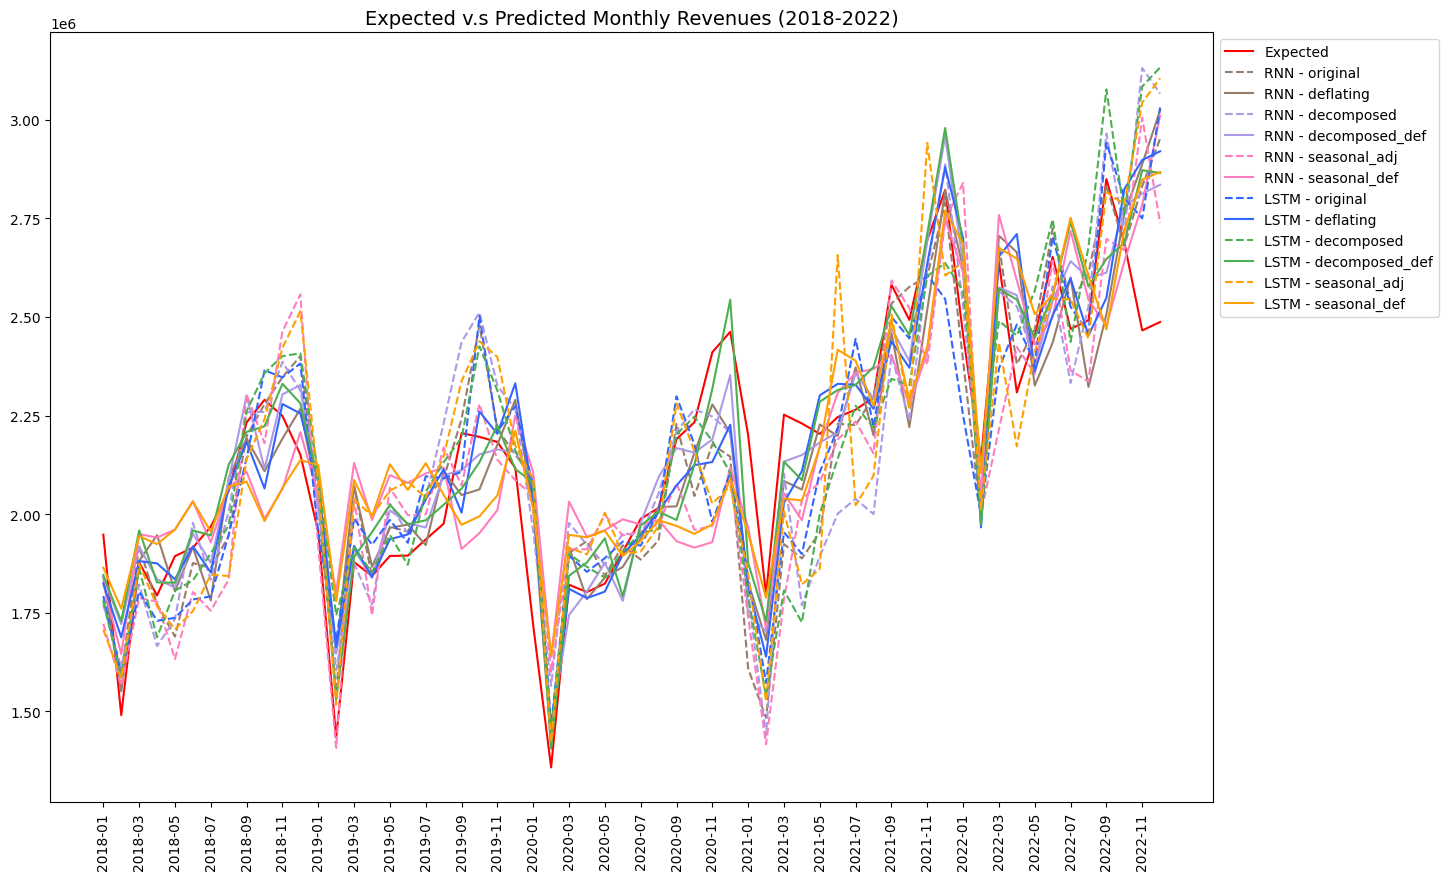

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rnn, pred_lstm, start_y, nn=True)

#### **8.1.2 分模型畫圖**

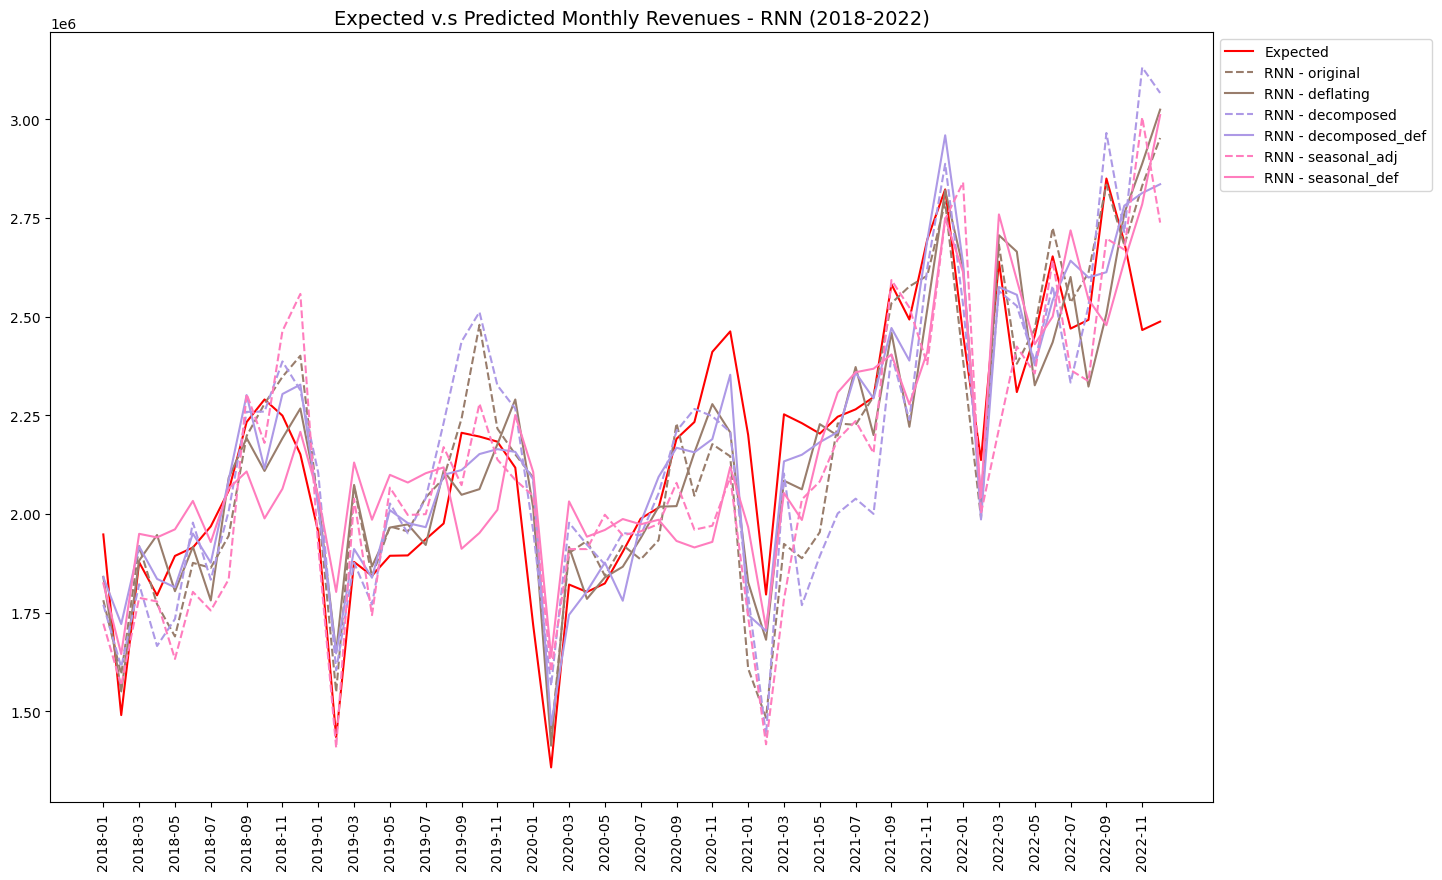

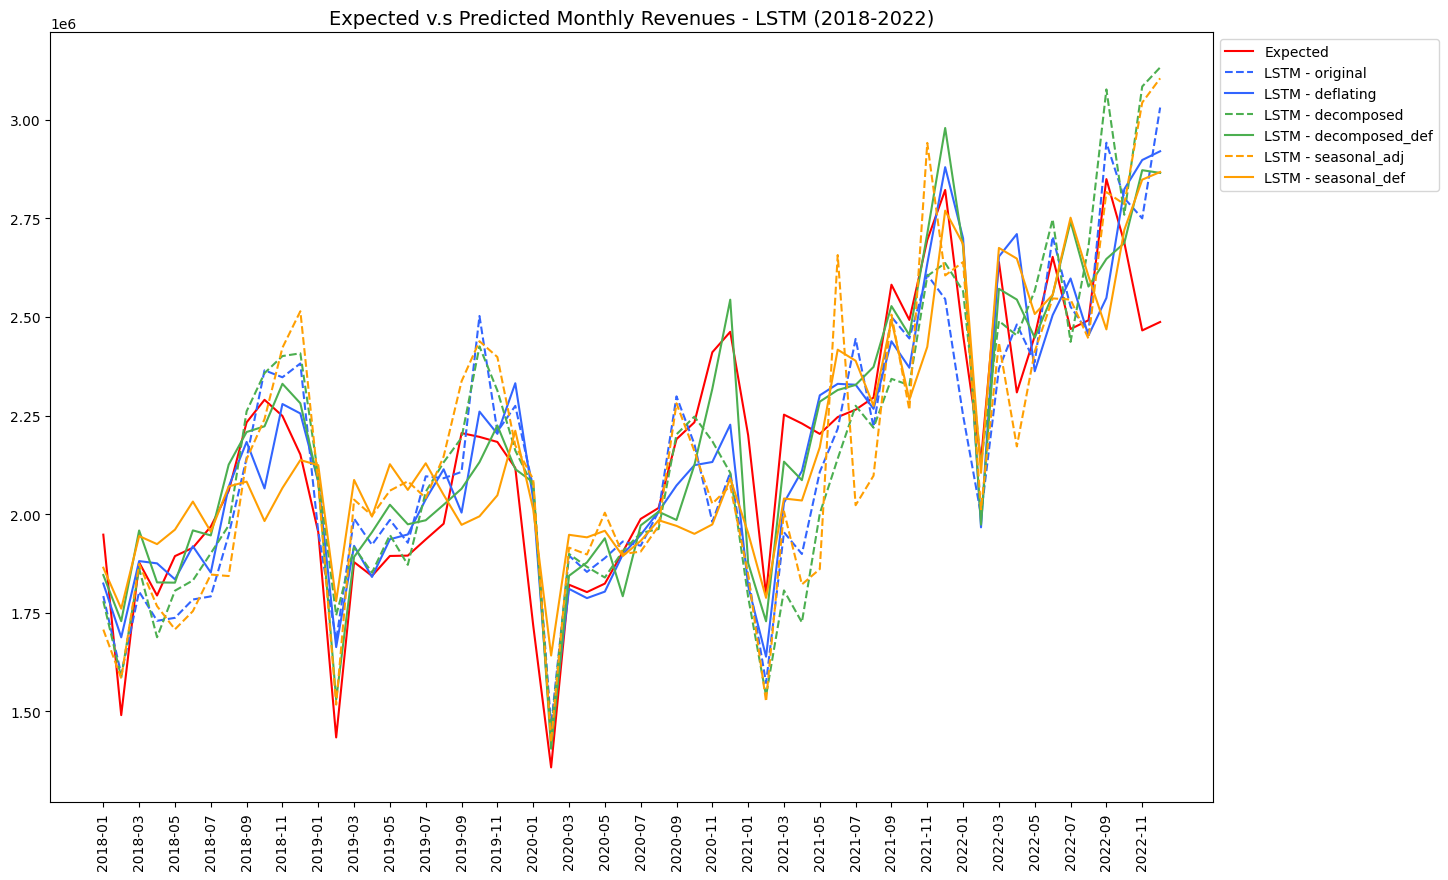

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rnn, 'rnn', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_lstm, 'lstm', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

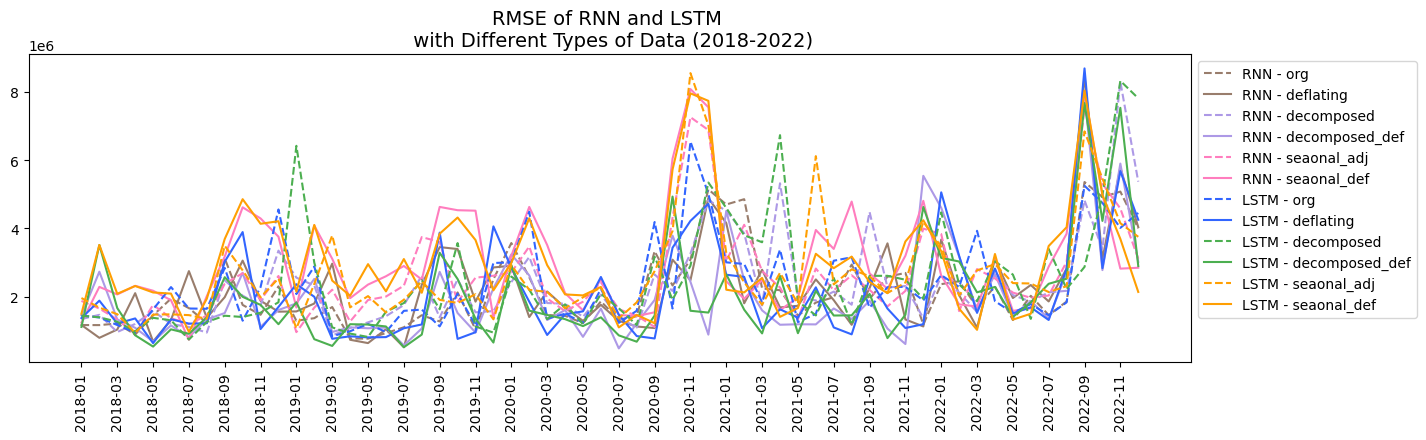

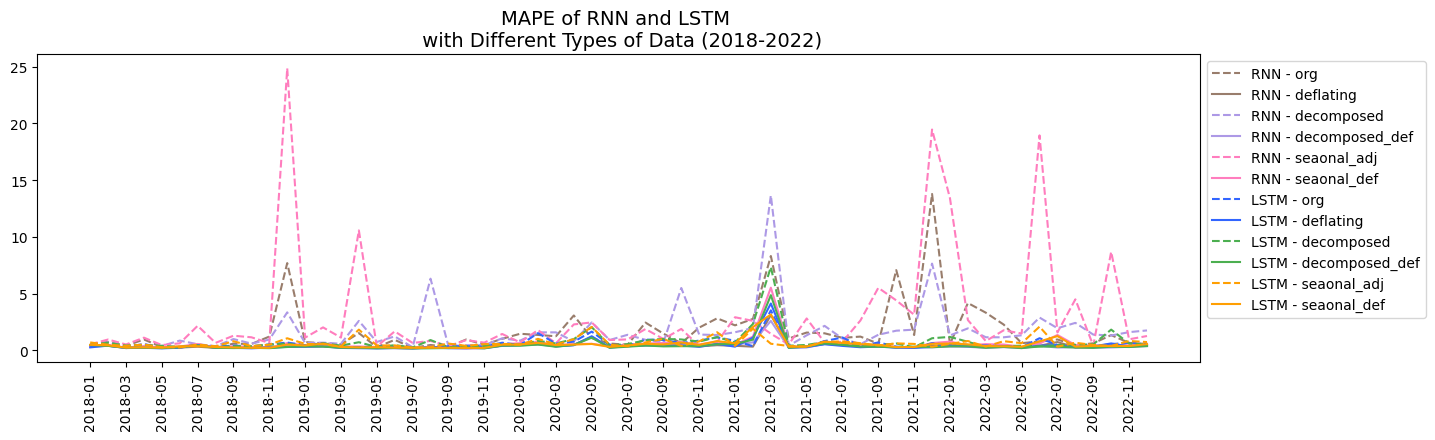

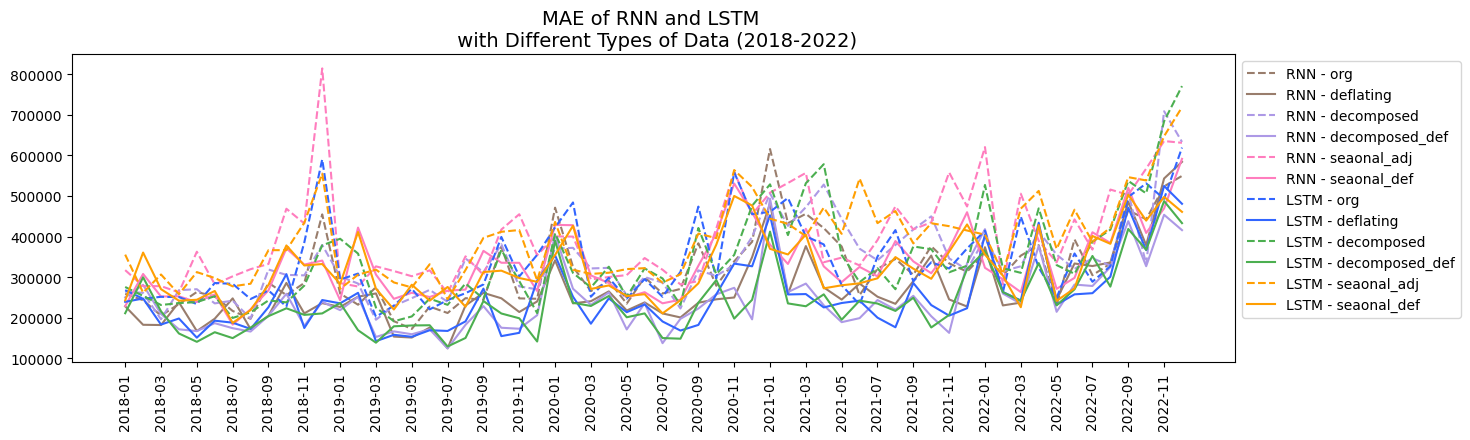

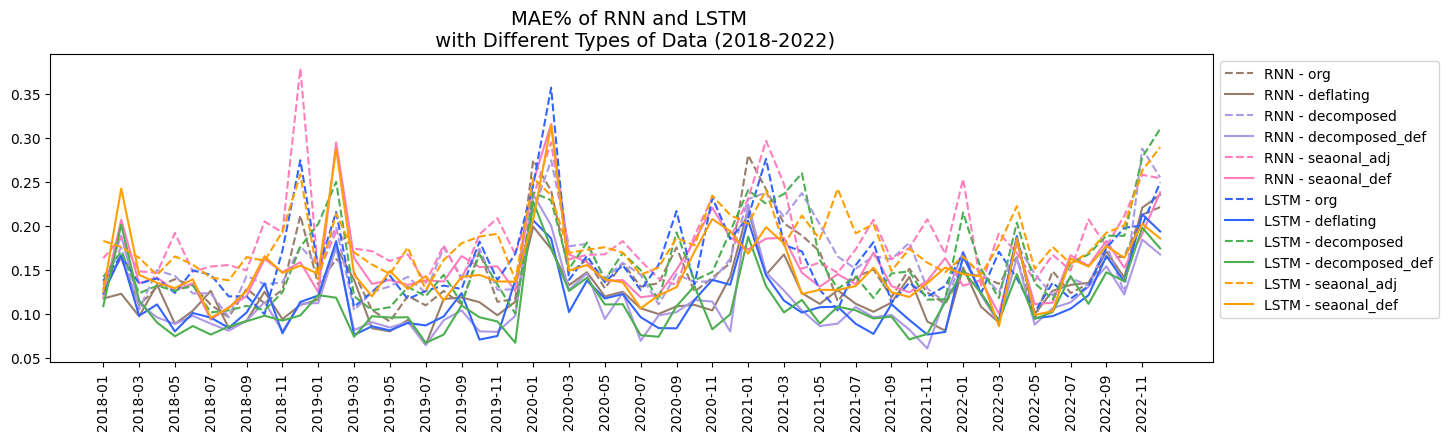

In [ ]:
plotAllScores(scores_rnn, scores_lstm, start_y, nn=True)

#### **8.2.2 分模型畫圖**

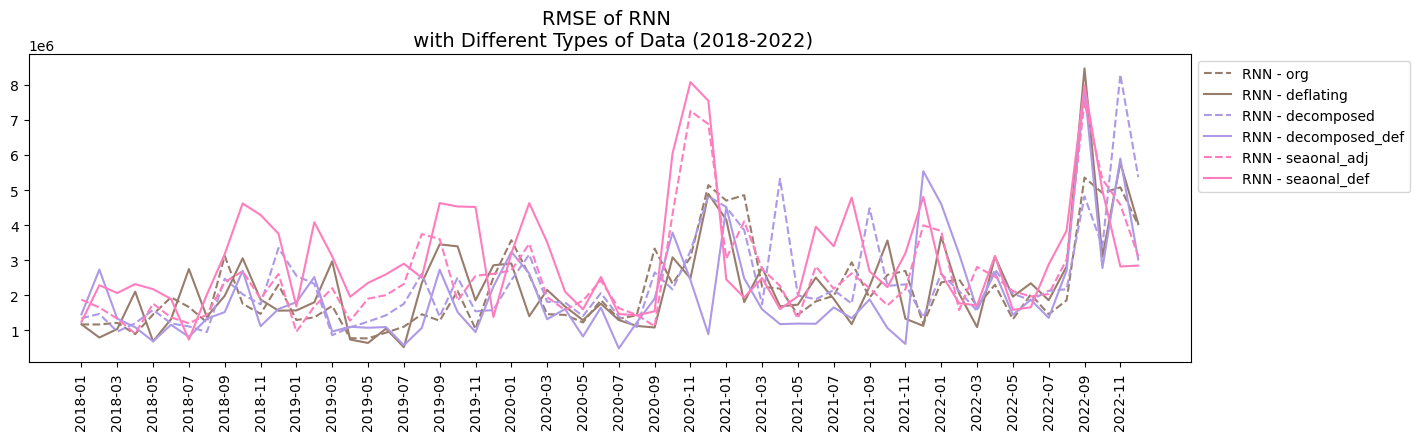

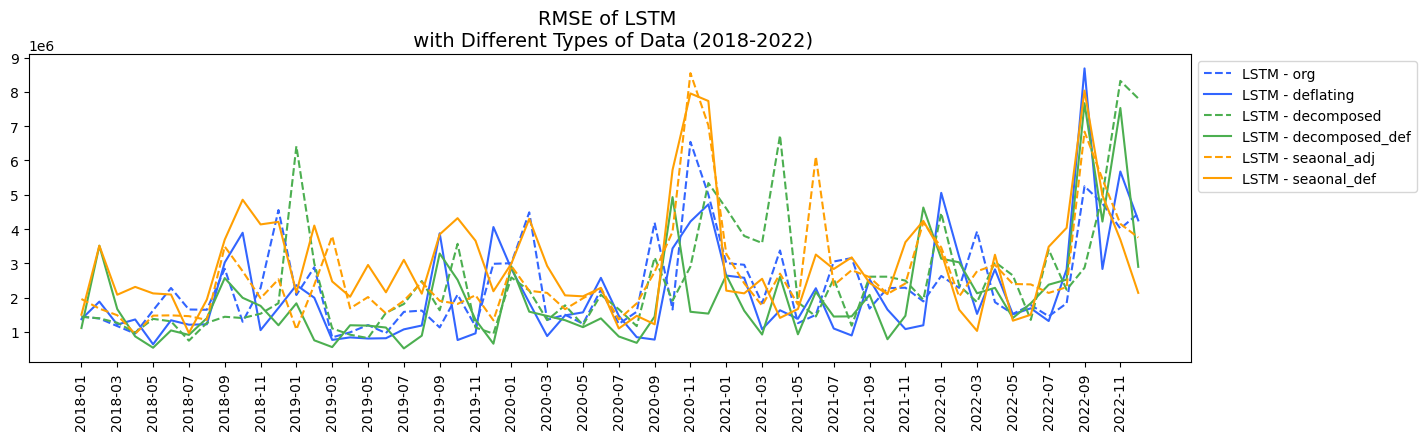

In [ ]:
# RMSE
compareModelScore(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)

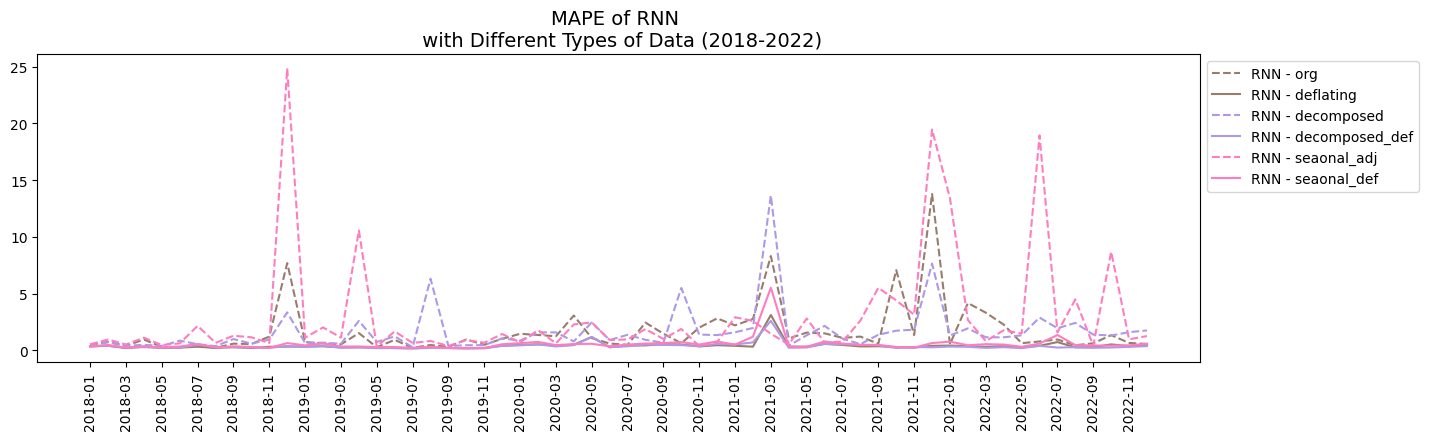

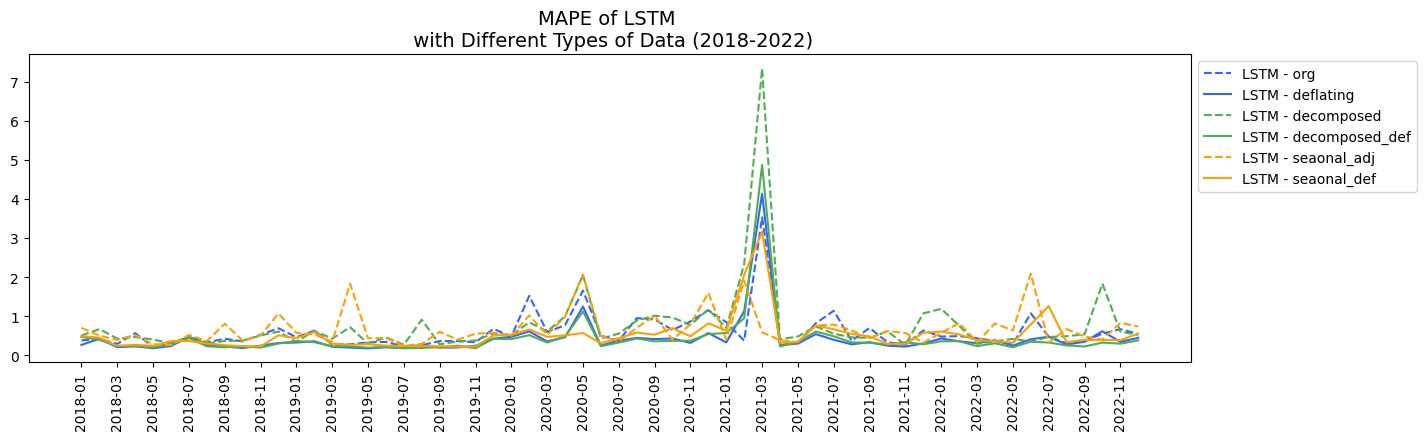

In [ ]:
# MAPE
compareModelScore(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)

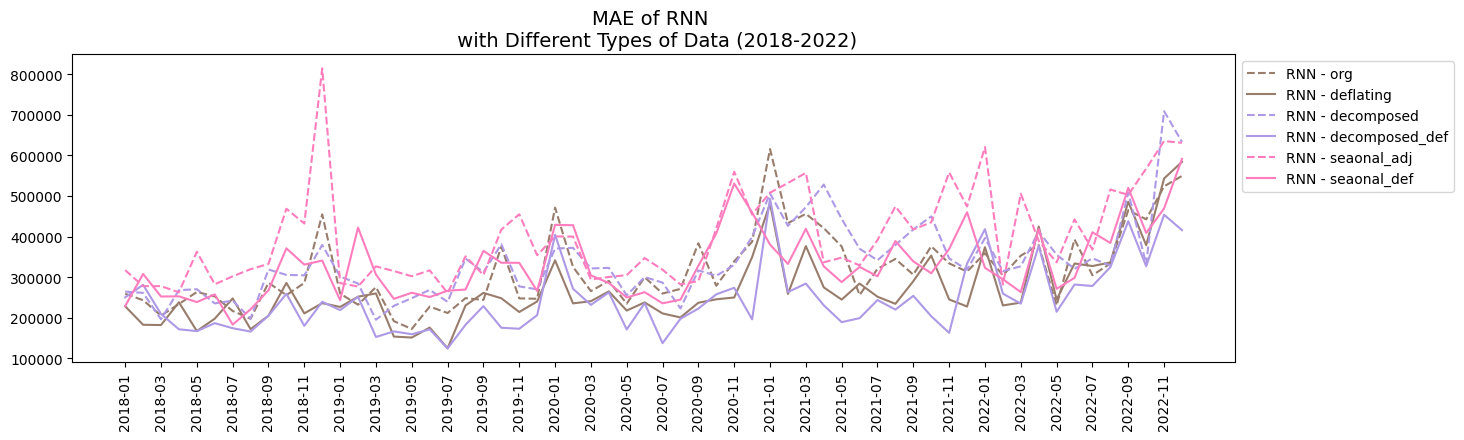

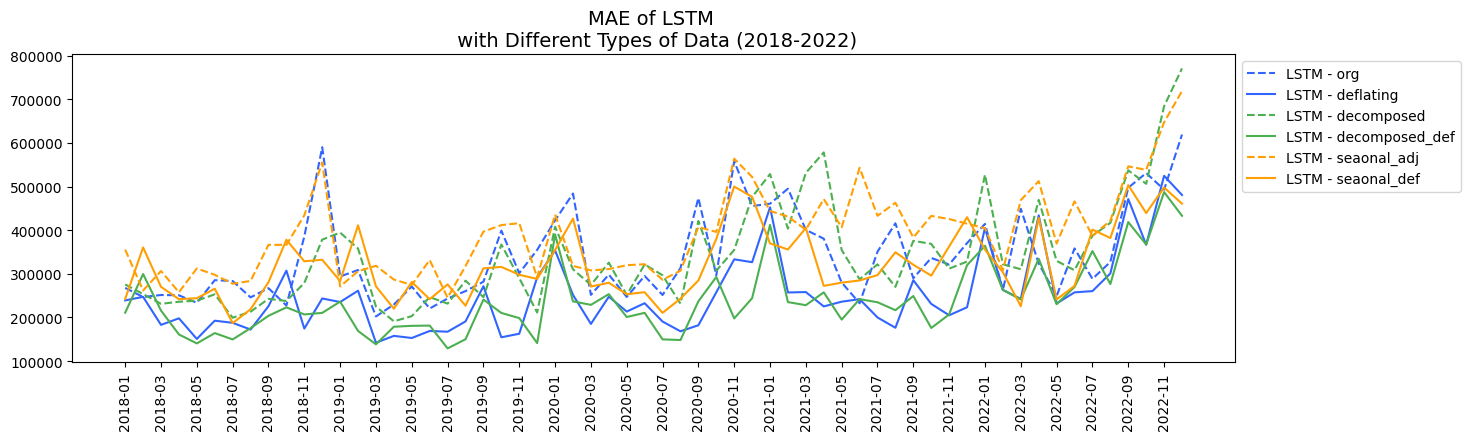

In [ ]:
# MAE
compareModelScore(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)

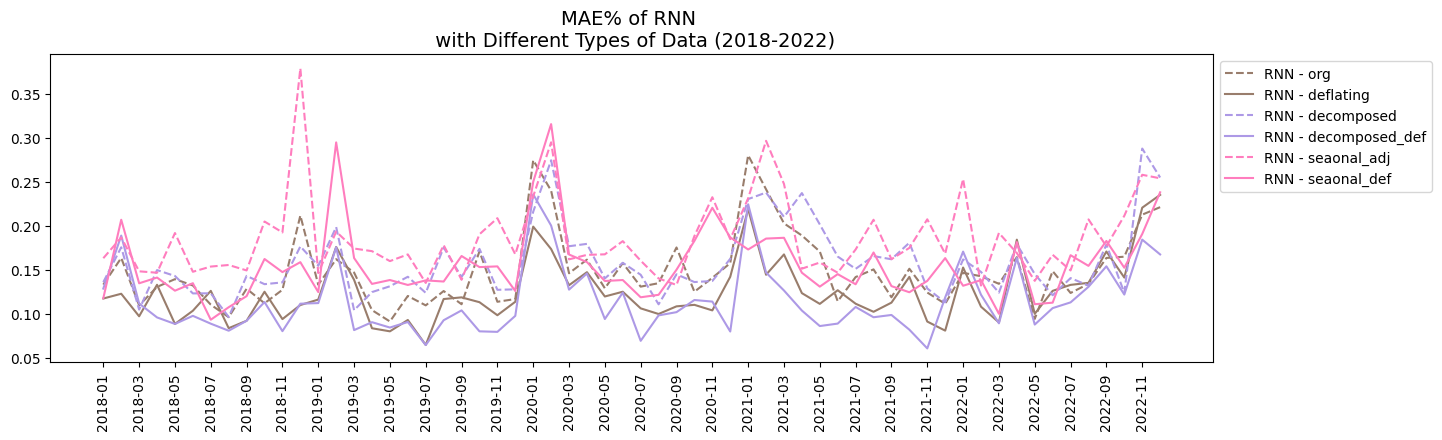

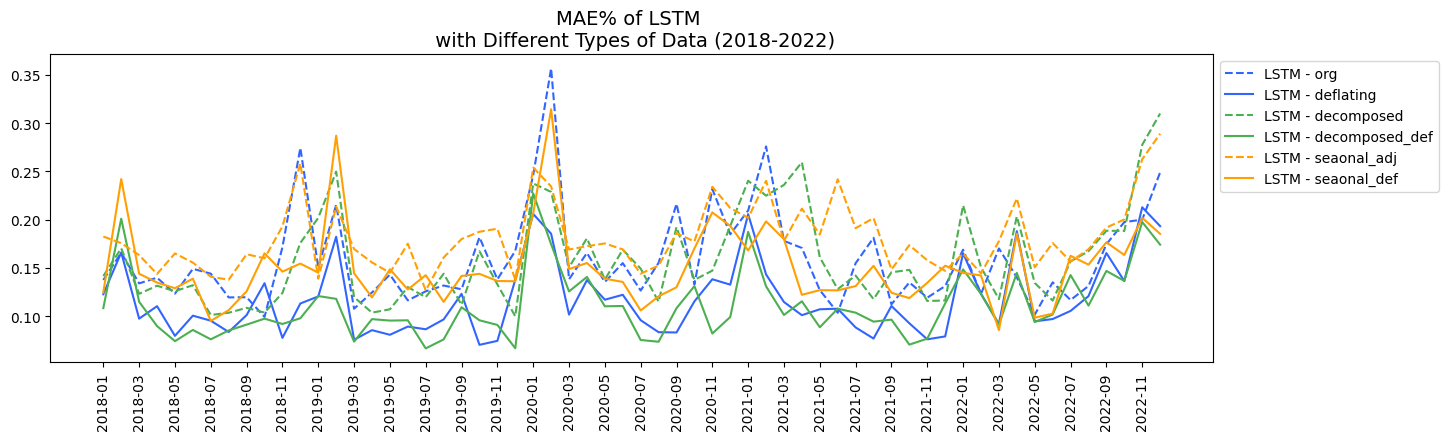

In [ ]:
# MAE%
compareModelScore(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)

#### **8.2.3 Boxplot**

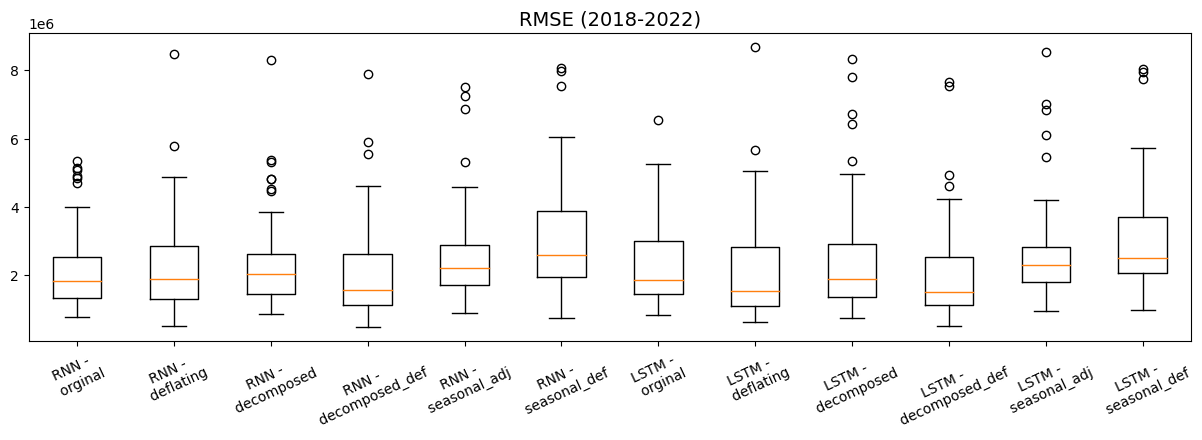

In [ ]:
# RMSE
scoreBoxplotV(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)

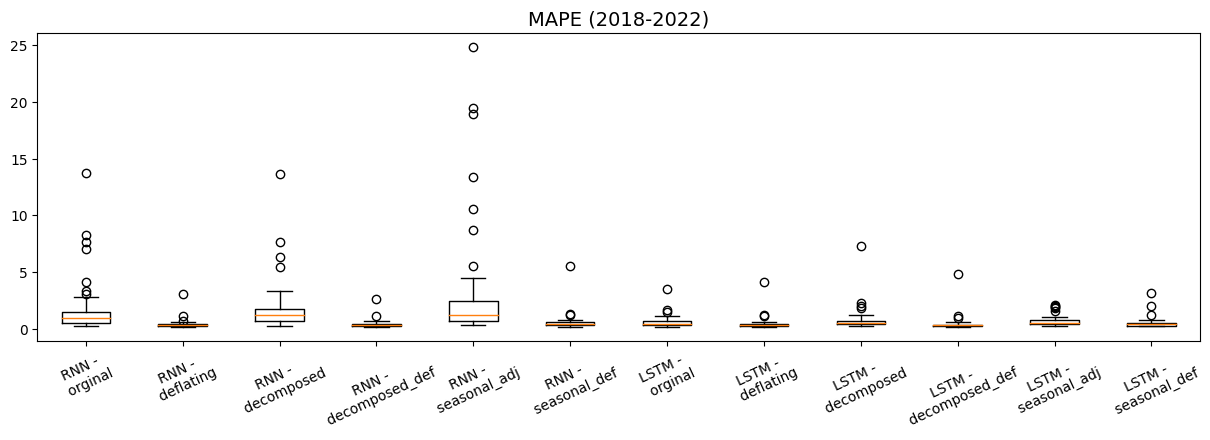

In [ ]:
# MAPE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)

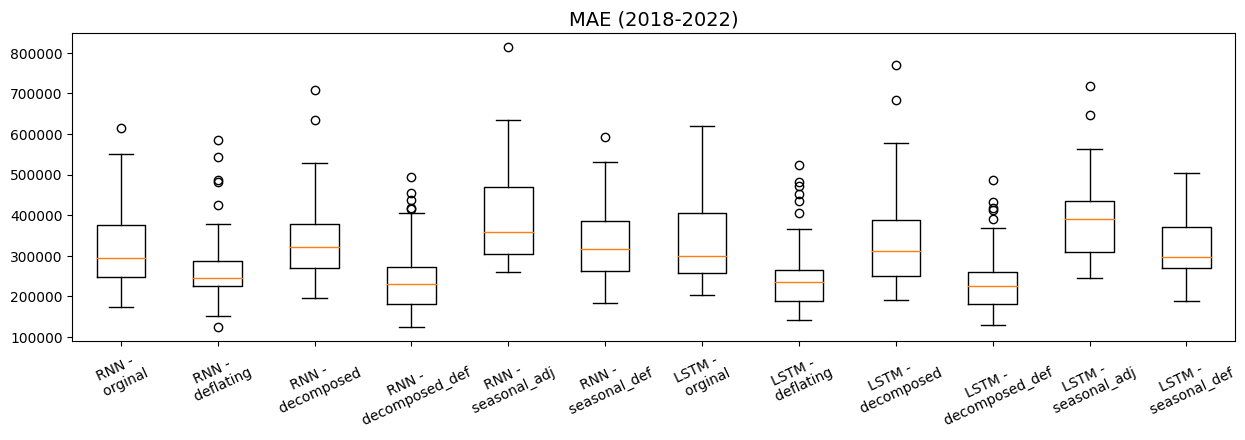

In [ ]:
# MAE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)

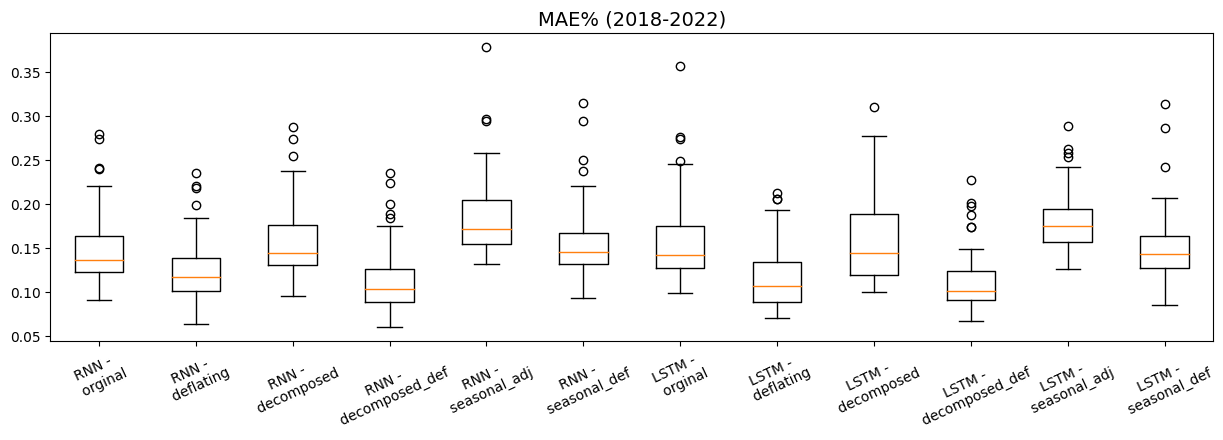

In [ ]:
# MAE%
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)

## **9. Best and Worst Model**

In [ ]:
bw = BestWorstModelNN(scores_rnn, scores_lstm)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0        RNN         org      RMSE   2019-05   775281.0
4        RNN         def      RMSE   2019-07   524724.0
8        RNN         dec      RMSE   2019-03   864972.0
12       RNN     dec_def      RMSE   2020-07   489295.0
16       RNN      season      RMSE   2018-04   910873.0
20       RNN  season_def      RMSE   2018-07   740678.0
0       LSTM         org      RMSE   2019-03   844647.0
4       LSTM         def      RMSE   2018-05   643623.0
8       LSTM         dec      RMSE   2018-07   749062.0
12      LSTM     dec_def      RMSE   2019-07   523232.0
16      LSTM      season      RMSE   2018-04   946452.0
20      LSTM  season_def      RMSE   2018-07   972508.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month  max_score
0        RNN         org      RMSE   2022-09  5358622.0
4        RNN         def      RMSE   2022-09  8468743.0
8        RNN         dec      RMSE   2022-11  8293982.0
12       RNN     dec_def      RMSE   2022-09  7898037.0
16       RNN      season      RMSE   2022-09  7519117.0
20       RNN  season_def      RMSE   2020-11  8078765.0
0       LSTM         org      RMSE   2020-11  6542957.0
4       LSTM         def      RMSE   2022-09  8684157.0
8       LSTM         dec      RMSE   2022-11  8320398.0
12      LSTM     dec_def      RMSE   2022-09  7668851.0
16      LSTM      season      RMSE   2020-11  8546169.0
20      LSTM  season_def      RMSE   2022-09  8036154.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3        RNN         org      MAPE   2018-08     0.2233
7        RNN         def      MAPE   2019-07     0.1879
11       RNN         dec      MAPE   2019-07     0.2805
15       RNN     dec_def      MAPE   2019-07     0.1796
19       RNN      season      MAPE   2019-05     0.3422
23       RNN  season_def      MAPE   2019-10     0.2032
3       LSTM         org      MAPE   2018-05     0.2171
7       LSTM         def      MAPE   2019-05     0.1779
11      LSTM         dec      MAPE   2021-11     0.2694
15      LSTM     dec_def      MAPE   2019-11     0.1824
19      LSTM      season      MAPE   2019-07     0.2444
23      LSTM  season_def      MAPE   2019-10     0.2189

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3        RNN         org      MAPE   2021-12    13.7781
7        RNN         def      MAPE   2021-03     3.1201
11       RNN         dec      MAPE   2021-03    13.6557
15       RNN     dec_def      MAPE   2021-03     2.6031
19       RNN      season      MAPE   2018-12    24.8383
23       RNN  season_def      MAPE   2021-03     5.5268
3       LSTM         org      MAPE   2021-03     3.5291
7       LSTM         def      MAPE   2021-03     4.1323
11      LSTM         dec      MAPE   2021-03     7.3387
15      LSTM     dec_def      MAPE   2021-03     4.8658
19      LSTM      season      MAPE   2022-06     2.0918
23      LSTM  season_def      MAPE   2021-03     3.1653

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1        RNN         org       MAE   2019-05   172314.0
5        RNN         def       MAE   2019-07   124536.0
9        RNN         dec       MAE   2019-03   194945.0
13       RNN     dec_def       MAE   2019-07   124346.0
17       RNN      season       MAE   2019-07   260943.0
21       RNN  season_def       MAE   2018-07   183012.0
1       LSTM         org       MAE   2019-03   202403.0
5       LSTM         def       MAE   2019-03   142157.0
9       LSTM         dec       MAE   2019-04   191187.0
13      LSTM     dec_def       MAE   2019-07   129135.0
17      LSTM      season       MAE   2019-07   245314.0
21      LSTM  season_def       MAE   2018-07   187121.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1        RNN         org       MAE   2021-01   615776.0
5        RNN         def       MAE   2022-12   584181.0
9        RNN         dec       MAE   2022-11   708896.0
13       RNN     dec_def       MAE   2021-01   493206.0
17       RNN      season       MAE   2018-12   814538.0
21       RNN  season_def       MAE   2022-12   591576.0
1       LSTM         org       MAE   2022-12   619318.0
5       LSTM         def       MAE   2022-11   524773.0
9       LSTM         dec       MAE   2022-12   770932.0
13      LSTM     dec_def       MAE   2022-11   487363.0
17      LSTM      season       MAE   2022-12   718929.0
21      LSTM  season_def       MAE   2022-09   503283.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2        RNN         org      MAE%   2019-05     0.0910
6        RNN         def      MAE%   2019-07     0.0643
10       RNN         dec      MAE%   2018-08     0.0961
14       RNN     dec_def      MAE%   2021-11     0.0604
18       RNN      season      MAE%   2022-02     0.1318
22       RNN  season_def      MAE%   2018-07     0.0930
2       LSTM         org      MAE%   2018-10     0.0993
6       LSTM         def      MAE%   2019-10     0.0704
10      LSTM         dec      MAE%   2019-12     0.0999
14      LSTM     dec_def      MAE%   2019-07     0.0667
18      LSTM      season      MAE%   2019-07     0.1267
22      LSTM  season_def      MAE%   2022-03     0.0856

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2        RNN         org      MAE%   2021-01     0.2799
6        RNN         def      MAE%   2022-12     0.2349
10       RNN         dec      MAE%   2022-11     0.2875
14       RNN     dec_def      MAE%   2020-01     0.2355
18       RNN      season      MAE%   2018-12     0.3786
22       RNN  season_def      MAE%   2020-02     0.3153
2       LSTM         org      MAE%   2020-02     0.3566
6       LSTM         def      MAE%   2022-11     0.2128
10      LSTM         dec      MAE%   2022-12     0.3099
14      LSTM     dec_def      MAE%   2020-01     0.2272
18      LSTM      season      MAE%   2022-12     0.2890
22      LSTM  season_def      MAE%   2020-02     0.3143

### **9.2 RNN 和 LSTM 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['RMSE']

modelName dataType scoreType min_month  min_score
12       RNN  dec_def      RMSE   2020-07   489295.0

In [ ]:
# LSTM
bw.best_lstm['RMSE']

modelName dataType scoreType min_month  min_score
12      LSTM  dec_def      RMSE   2019-07   523232.0

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['RMSE']

modelName dataType scoreType max_month  max_score
4       RNN      def      RMSE   2022-09  8468743.0

In [ ]:
# LSTM
bw.worst_lstm['RMSE']

modelName dataType scoreType max_month  max_score
4      LSTM      def      RMSE   2022-09  8684157.0

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAPE']

modelName dataType scoreType min_month  min_score
15       RNN  dec_def      MAPE   2019-07     0.1796

In [ ]:
# LSTM
bw.best_lstm['MAPE']

modelName dataType scoreType min_month  min_score
7      LSTM      def      MAPE   2019-05     0.1779

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAPE']

modelName dataType scoreType max_month  max_score
19       RNN   season      MAPE   2018-12    24.8383

In [ ]:
# LSTM
bw.worst_lstm['MAPE']

modelName dataType scoreType max_month  max_score
11      LSTM      dec      MAPE   2021-03     7.3387

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE']

modelName dataType scoreType min_month  min_score
13       RNN  dec_def       MAE   2019-07   124346.0

In [ ]:
# LSTM
bw.best_lstm['MAE']

modelName dataType scoreType min_month  min_score
13      LSTM  dec_def       MAE   2019-07   129135.0

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE']

modelName dataType scoreType max_month  max_score
17       RNN   season       MAE   2018-12   814538.0

In [ ]:
# LSTM
bw.worst_lstm['MAE']

modelName dataType scoreType max_month  max_score
9      LSTM      dec       MAE   2022-12   770932.0

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE%']

modelName dataType scoreType min_month  min_score
14       RNN  dec_def      MAE%   2021-11     0.0604

In [ ]:
# LSTM
bw.best_lstm['MAE%']

modelName dataType scoreType min_month  min_score
14      LSTM  dec_def      MAE%   2019-07     0.0667

##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE%']

modelName dataType scoreType max_month  max_score
18       RNN   season      MAE%   2018-12     0.3786

In [ ]:
# LSTM
bw.worst_lstm['MAE%']

modelName dataType scoreType max_month  max_score
2      LSTM      org      MAE%   2020-02     0.3566

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
12       RNN  dec_def      RMSE   2020-07   489295.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month  max_score
4      LSTM      def      RMSE   2022-09  8684157.0

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7      LSTM      def      MAPE   2019-05     0.1779

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
19       RNN   season      MAPE   2018-12    24.8383

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
13       RNN  dec_def       MAE   2019-07   124346.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
17       RNN   season       MAE   2018-12   814538.0

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
14       RNN  dec_def      MAE%   2021-11     0.0604

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName dataType scoreType max_month  max_score
18       RNN   season      MAE%   2018-12     0.3786